   Message_ID                                       Message_Text  \
0           1     schedule call me schedule documents assignment   
1           2  bank alert investment scheme claim now bank al...   
2           3  documents dinner project update assignment inv...   
3           4                      dinner project update meeting   
4           5                schedule family trip project update   

  Caller_Location  Is_Fraud Communication_Type  Duration_Seconds  
0           Noida         0                SMS                 0  
1          Mumbai         1                SMS                 0  
2          Mumbai         0                SMS                 0  
3          Mumbai         0                SMS                 0  
4           Noida         0                SMS                 0  
--Metrices--!
Accuracy_Score: 0.73875
Precision_Score: 0.0
Recall_Score: 0.0
F1_Score: 0.0


c:\Users\nikha\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


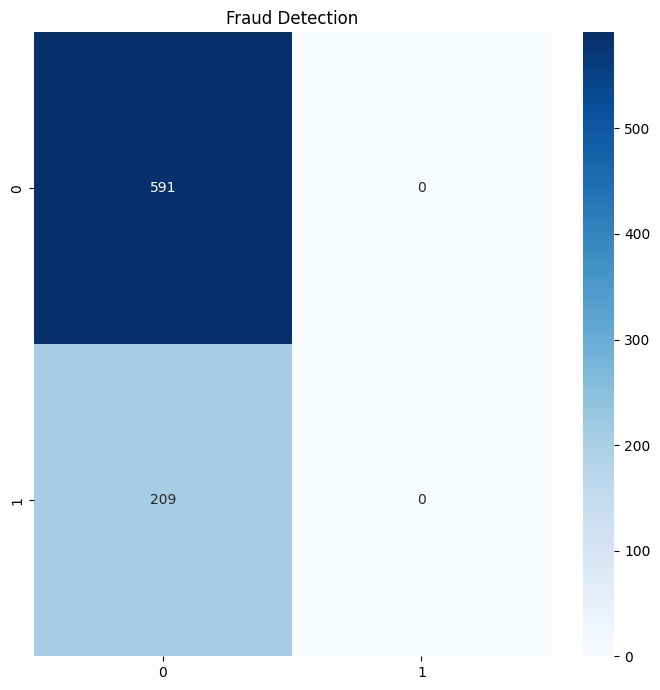

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df=pd.read_csv("fraud_detection_dataset_2000.csv")
print(df.head())

le_loc = LabelEncoder()
le_type = LabelEncoder()

df["Message_Text"]=le_loc.fit_transform(df["Message_Text"])
df["Caller_Location"] = le_loc.fit_transform(df["Caller_Location"])
df["Communication_Type"] = le_type.fit_transform(df["Communication_Type"])

x=df[["Message_Text","Caller_Location","Communication_Type","Duration_Seconds"]]
y=df["Is_Fraud"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=50)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

model=LogisticRegression(max_iter=2000)
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

print("--Metrices--!")
print("Accuracy_Score:",accuracy_score(y_test,y_pred))
print("Precision_Score:",precision_score(y_test,y_pred))
print("Recall_Score:",recall_score(y_test,y_pred))
print("F1_Score:",f1_score(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(7,7))
plt.xlabel("Fraud")
plt.ylabel("Not_Fraud")
plt.title("Fraud Detection")
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.tight_layout()
plt.show()